In [1]:
import matplotlib.pyplot as plt
import numpy as np
import aubio


In [2]:
# YIN pitches
def f0Function(filename, downsample, samplerate, tolerance):
    win_s = 1764 // downsample # fft size
    hop_s = 441 // downsample # hop size
    s = aubio.source(filename, samplerate, hop_s)
    samplerate = s.samplerate

    pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate) 
    #pitch_o.set_unit("midi")
    pitch_o.set_tolerance(tolerance)

    pitchesYIN = []
    confidences = [] 
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        pitchesYIN += [pitch]
        confidences += [confidence]
        total_frames += read
        if read < hop_s:
             break        

    

    

    
    return pitchesYIN



In [3]:
Note1 = f0Function(filename = 'avmA.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


In [4]:
def plotFunc (vectorVals, plotTitle, xLab, yLab, ylimLow, ylimHigh):
    
    

    fig, (ax1) = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(12, 8))
    ax1.plot(np.asarray(vectorVals), label='YIN', color='blue')
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.ylim(ylimLow, ylimHigh)
    plt.title(plotTitle)
   
    

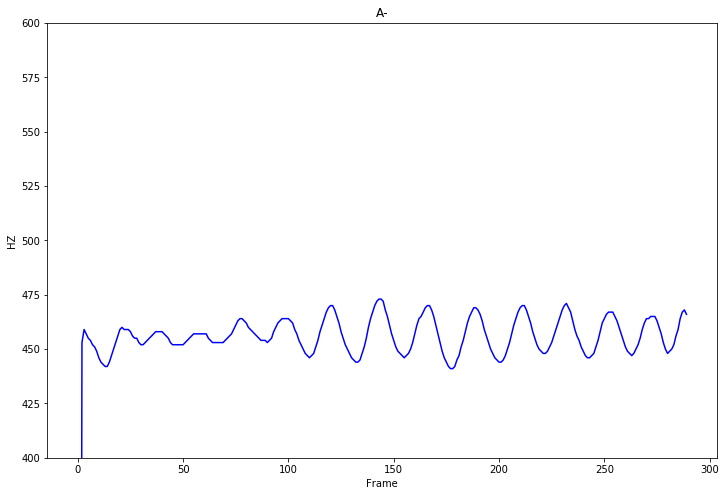

In [5]:
plot1 = plotFunc (Note1, 'A-', 'Frame', 'HZ', 400, 600)

In [6]:
Note2 = f0Function(filename = 'avmVe.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


In [7]:
Note3 = f0Function(filename = 'avmMa.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


In [8]:
Note4 = f0Function(filename = 'avmRi1.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


In [9]:
Note5 = f0Function(filename = 'avmI.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


In [10]:
Note6 = f0Function(filename = 'avmA2.wav', downsample = 1, samplerate = 44100, tolerance = 0.1)


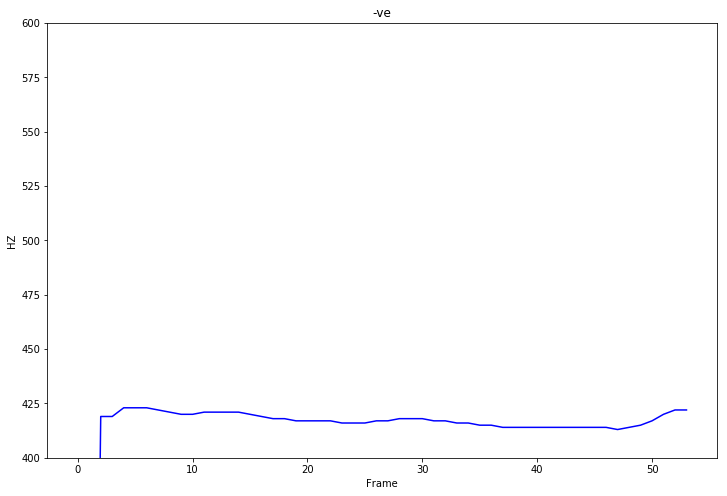

In [11]:
plot2 = plotFunc (Note2, '-ve', 'Frame', 'HZ', 400, 600)

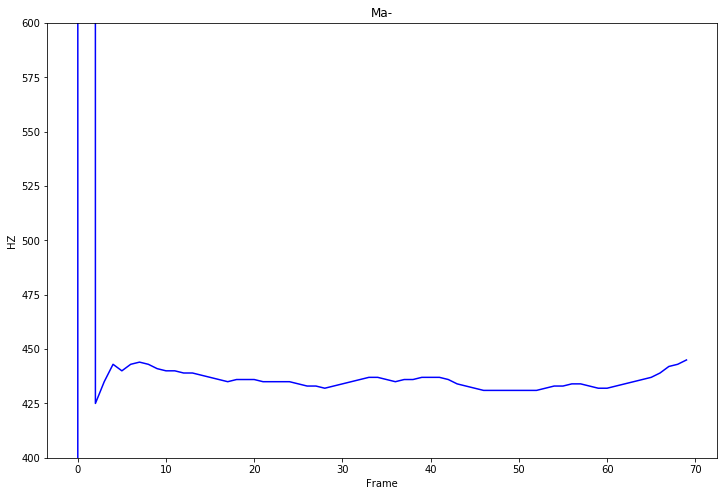

In [12]:
plot3 = plotFunc (Note3, 'Ma-', 'Frame', 'HZ', 400, 600)

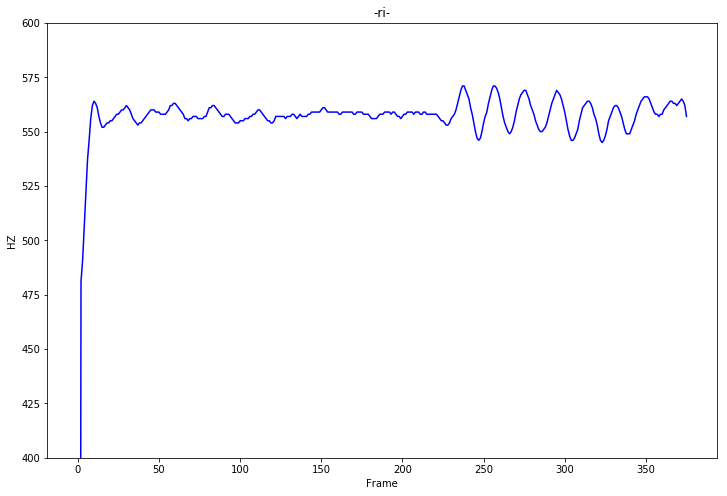

In [13]:
plot4 = plotFunc (Note4, '-ri-', 'Frame', 'HZ', 400, 600)

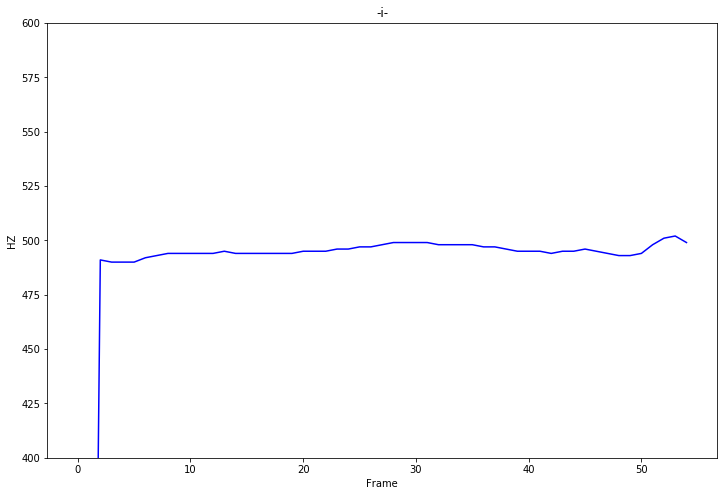

In [14]:
plot5 = plotFunc (Note5, '-i-', 'Frame', 'HZ', 400, 600)

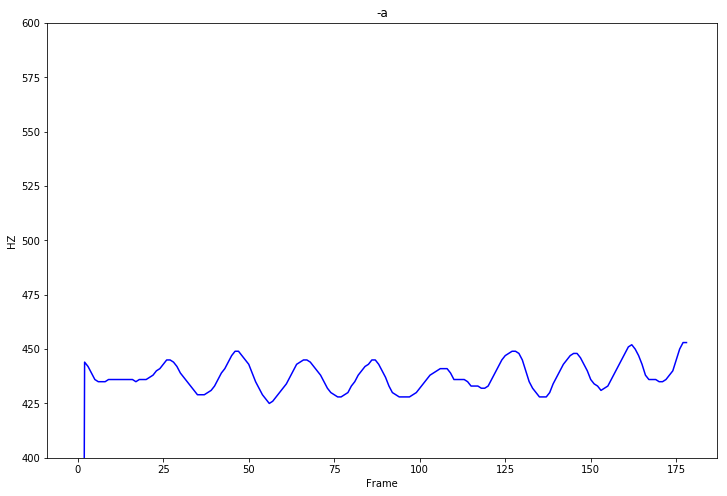

In [15]:
plot6 = plotFunc (Note6, '-a', 'Frame', 'HZ', 400, 600)

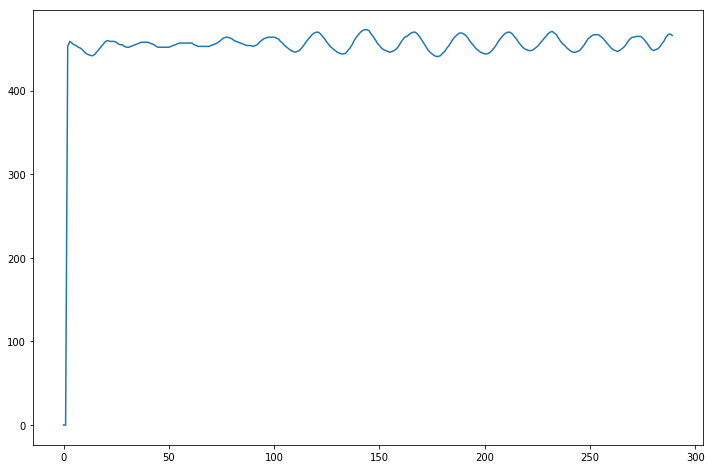

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(1,1,1)    
plt.plot(np.asarray(Note1))

In [54]:
def NEWplotFunc (subPlotVals, vectorVals, plotTitle, xLab, yLab, ylimLow, ylimHigh):
    
    plt.subplot(3,2, subPlotVals) 
    plt.plot(np.asarray(vectorVals))
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.ylim(ylimLow, ylimHigh)
    plt.title(plotTitle)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
       


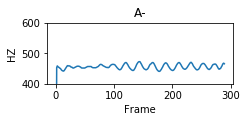

In [55]:
NEWplotFunc (1, Note1, 'A-', 'Frame', 'HZ', 400, 600 )

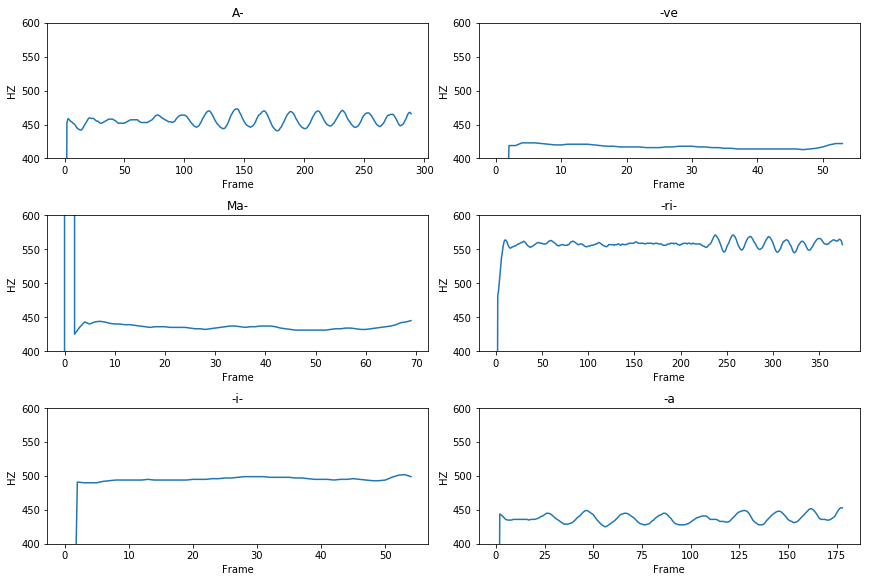

In [56]:

plt.figure(figsize=(12, 8))

NEWplotFunc (1, Note1, 'A-', 'Frame', 'HZ', 400, 600 )
NEWplotFunc (2, Note2, '-ve', 'Frame', 'HZ', 400, 600 )
NEWplotFunc (3, Note3, 'Ma-', 'Frame', 'HZ', 400, 600)
NEWplotFunc (4, Note4, '-ri-', 'Frame', 'HZ', 400, 600 )
NEWplotFunc (5, Note5, '-i-', 'Frame', 'HZ', 400, 600 )
NEWplotFunc (6, Note6, '-a', 'Frame', 'HZ', 400, 600)
    




